## Import các thư viện cần thiết

In [ ]:
#install.packages("tidyverse")
#library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Đọc dữ liệu

In [ ]:
spotify_songs<-read.csv("/content/drive/MyDrive/Colab Notebooks/Nam3-HK2/BigData/Project/songs_normalize.csv")
head(spotify_songs)
dim(spotify_songs)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop
2,blink-182,All The Small Things,167066,FALSE,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.00e+00,0.6120,0.684,148.726,"rock, pop"
3,Faith Hill,Breathe,250546,FALSE,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.00e+00,0.2510,0.278,136.859,"pop, country"
4,Bon Jovi,It's My Life,224493,FALSE,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal"
5,*NSYNC,Bye Bye Bye,200560,FALSE,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,1.04e-03,0.0845,0.879,172.656,pop
6,Sisqo,Thong Song,253733,TRUE,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,9.64e-05,0.0700,0.714,121.549,"hip hop, pop, R&B"


[1] 2000   18

## 2. Làm sạch dữ liệu

### 2.1. Thay thế giá trị Na với giá trị trung vị (median).

In [ ]:
colSums(is.na(spotify_songs))
spotify_songs[is.na(spotify_songs)]<-median(spotify_songs$popularity,na.rm=TRUE)
colSums(is.na(spotify_songs))

artist             song      duration_ms         explicit 
               0                0                0                0 
            year       popularity     danceability           energy 
               0              106                0                0 
             key         loudness             mode      speechiness 
               0                0                0                0 
    acousticness instrumentalness         liveness          valence 
               0                0                0                0 
           tempo            genre 
               0                0

artist             song      duration_ms         explicit 
               0                0                0                0 
            year       popularity     danceability           energy 
               0                0                0                0 
             key         loudness             mode      speechiness 
               0                0                0                0 
    acousticness instrumentalness         liveness          valence 
               0                0                0                0 
           tempo            genre 
               0                0

### 2.2. Xóa các hàng bị trùng lặp

In [ ]:
dim(spotify_songs)

spotify_songs<-unique(spotify_songs)
dim(spotify_songs)

[1] 2000   18

[1] 1941   18

### 2.3. Chuyển đổi kiểu dữ liệu từ mili giây sang phút.

In [ ]:
spotify_songs <- spotify_songs %>% mutate(duration_min = (duration_ms / 1000) / 60)
head(spotify_songs)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min
,<chr>,<chr>,<int>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop,3.519333
2,blink-182,All The Small Things,167066,FALSE,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.00e+00,0.6120,0.684,148.726,"rock, pop",2.784433
3,Faith Hill,Breathe,250546,FALSE,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.00e+00,0.2510,0.278,136.859,"pop, country",4.175767
4,Bon Jovi,It's My Life,224493,FALSE,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal",3.741550
5,*NSYNC,Bye Bye Bye,200560,FALSE,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,1.04e-03,0.0845,0.879,172.656,pop,3.342667
6,Sisqo,Thong Song,253733,TRUE,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,9.64e-05,0.0700,0.714,121.549,"hip hop, pop, R&B",4.228883


### 2.4. Xóa các cột không liên quan.

In [ ]:
dim(spotify_songs)

spotify_songs<-spotify_songs[,-c(3,9,11,14)]
dim(spotify_songs)

[1] 1941   19

[1] 1941   15

## 3. Phân tích và trực quan tập dữ liệu

### 3.1. Mức độ phổ biến của bài hát được phân bổ như thế nào? 10 bài hát hàng đầu là gì?

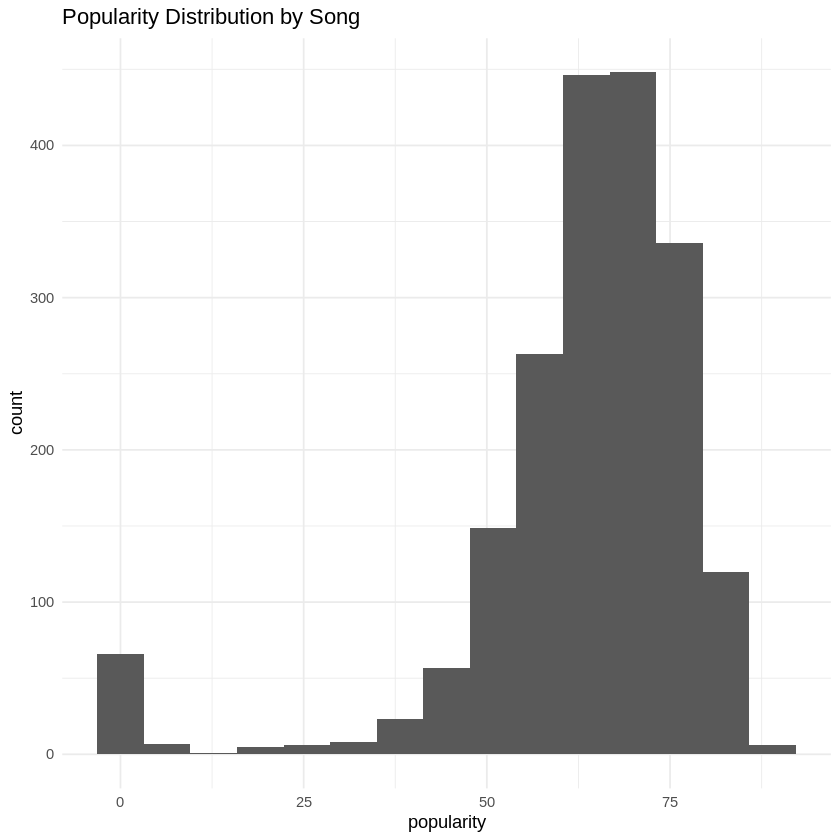

In [ ]:
ggplot(spotify_songs, aes(x = popularity)) +
  geom_histogram(bins = 15) +
  labs(title = "Popularity Distribution by Song") +
  theme_minimal()

**10 bài hát phổ biến hàng đầu?**

In [ ]:
selected_data <- spotify_songs %>%
  select(song, popularity, genre)
grouped_data <- selected_data %>%
  group_by(song) %>%
  arrange(desc(popularity))
top_songs <- head(grouped_data, 10)
print(top_songs)

# A tibble: 10 × 3
# Groups:   song [10]
   song                 popularity genre                     
   <chr>                     <dbl> <chr>                     
 1 Sweater Weather              89 rock, pop                 
 2 Another Love                 88 pop                       
 3 Without Me                   87 hip hop                   
 4 The Real Slim Shady          86 hip hop                   
 5 Wait a Minute!               86 pop, R&B, Dance/Electronic
 6 lovely (with Khalid)         86 pop, Dance/Electronic     
 7 'Till I Collapse             85 hip hop                   
 8 Locked out of Heaven         85 pop                       
 9 Daddy Issues                 85 rock, pop                 
10 The Nights                   85 pop, Dance/Electronic     


### 3.2. Top 5 thể loại nhạc phổ biến nhất.

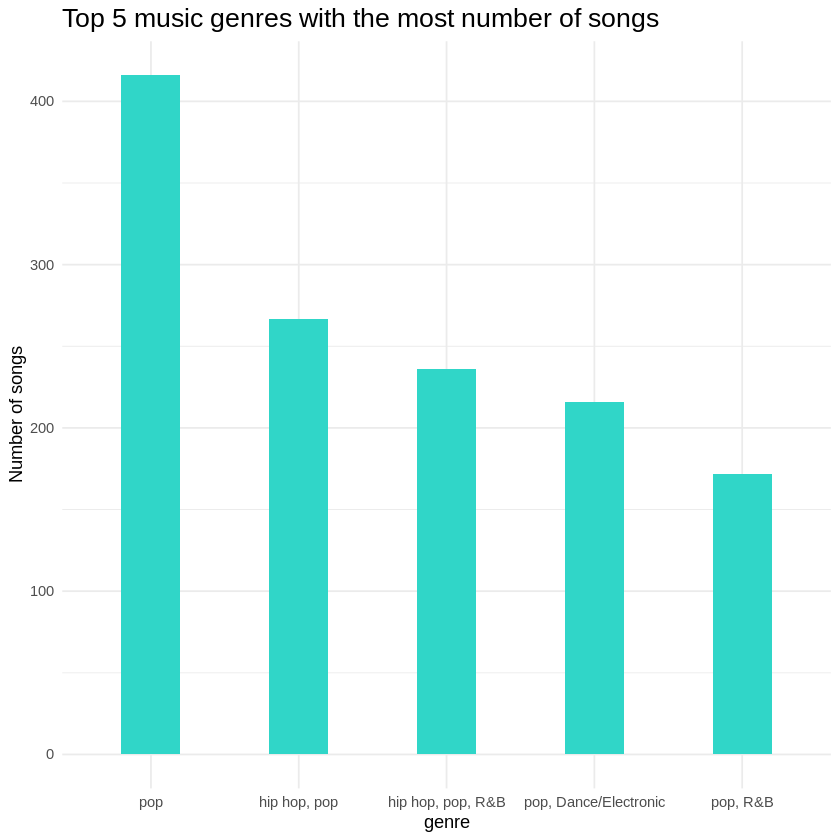

In [ ]:
# Đếm số lượng bài hát theo thể loại
genre <- spotify_songs %>% count(genre, sort = TRUE, name = "Count")
# Lọc top 5 dòng nhạc có số lượng bài hát nhiều nhất
genreFil <- genre[1:5, ]
# Sắp xếp cột x theo thứ tự từ lớn đến bé
genreFil$genre <- reorder(genreFil$genre, -genreFil$Count)
# Tạo biểu đồ với cột x đã được sắp xếp
ggplot(genreFil, aes(x = genre, y = Count)) +
     geom_bar(stat = "identity", width = 0.4, fill = "#30d6c8") +
     labs(x = "genre", y = "Number of songs", title = "Top 5 music genres with the most number of songs") +
     theme_minimal() +
     theme(plot.title = element_text(color = "black", size = 16))


### 3.3. Số lượng bài hát có nội dung không phù hợp với trẻ em trong các bài hát hàng đầu.

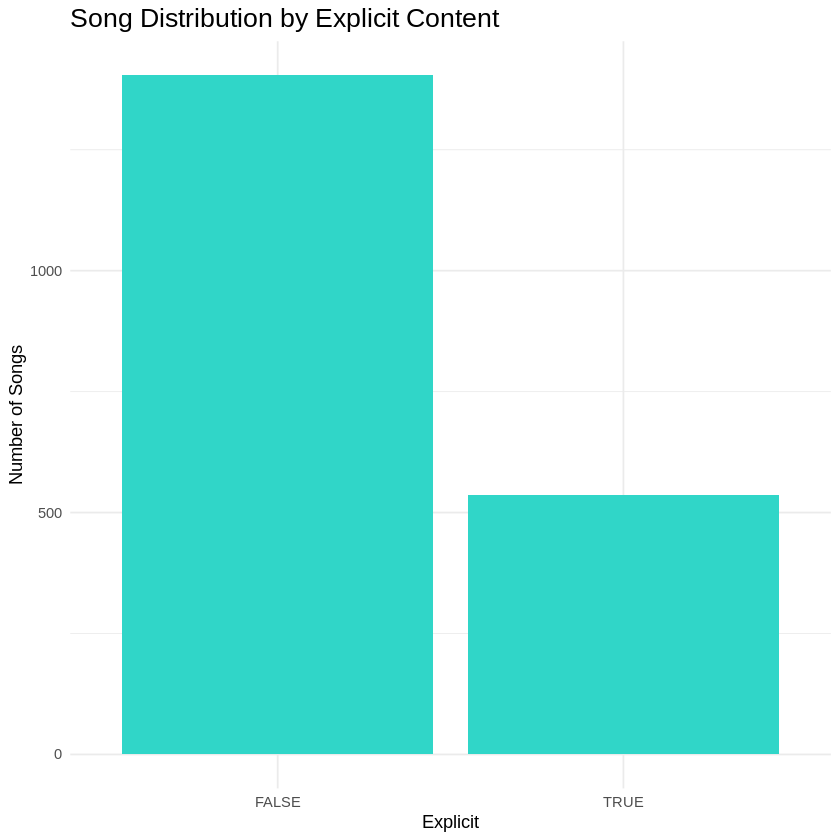

In [ ]:
explicit <- spotify_songs %>% count(explicit, name = "Count")

# Tạo biểu đồ cột
ggplot(explicit, aes(x = explicit, y = Count)) +
     geom_col(fill = "#30d6c8") +
     labs(x = "Explicit", y = "Number of Songs", title = "Song Distribution by Explicit Content") +
     theme_minimal() +
     theme(plot.title = element_text(color = "black", size = 16))


Nhận xét: Hầu hết các bản hit hàng đầu đều có nội dung bài hát lành mạnh.

### 3.4. Mức độ phổ biến của bài hát thay đổi như thế nào với nội dung nhạy cảm? Nội dung nhạy cảm có tác động tích cực, tiêu cực hoặc trung lập đến mức độ phổ biến của bài hát không?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


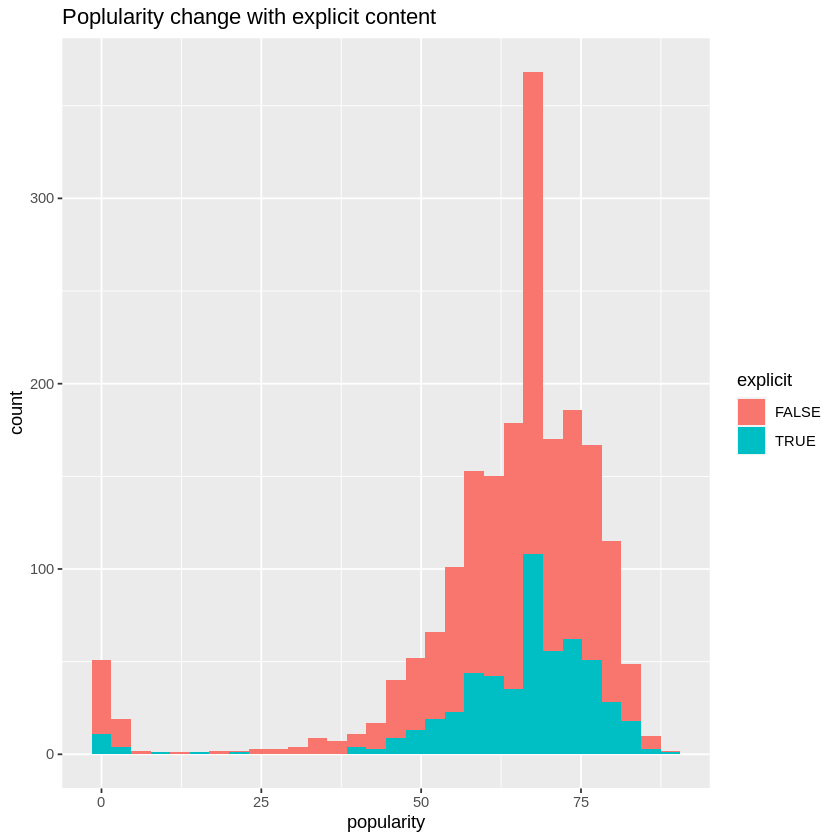

In [ ]:
library(ggplot2)
popularity_explicit_content<- spotify_songs %>%
  ggplot(aes(x=popularity, fill=explicit))+
  geom_histogram()+
  ggtitle("Poplularity change with explicit content")
popularity_explicit_content

Nhận xét: Nội dung nhạy cảm explicit = "TRUE" khi lời bài hát hoặc nội dung của bài hát chứa một hoặc nhiều tiêu chí không phù hợp với trẻ em. Trong hình ảnh trực quan trên, ta thấy rằng bài hát chứa và không chứa nội dung nhạy cảm đều giống với sự phân phối của mức độ phổ biến của bài hát -> Kết luận: ta có thể kết luận rằng các bài hát “explicit = TRUE ít hoặc không ảnh hưởng đến mức độ phổ biến của các bài hát so với các bài hát “explicit = FALSE”.

### 3.5. Tỷ lệ bài hát được đánh giá cao, trung bình hoặc thấp là bao nhiêu?

In [ ]:
summary(spotify_songs$popularity)
head(spotify_songs$popularity,10)

spotify_songs$popularity_rating <- as.factor(
     ifelse(spotify_songs$popularity<=60, "Low - Under 60",
            ifelse(spotify_songs$popularity<=80, "Med - 60-79",
                   ifelse(spotify_songs$popularity>80,'High - 80 above',"High - 80 above")
            ))
 )
head(spotify_songs$popularity_rating, 10)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   58.00   66.00   63.24   73.00   89.00 

[1] 77 79 66 78 65 69 86 68 75 77

[1] Med - 60-79     Med - 60-79     Med - 60-79     Med - 60-79    
 [5] Med - 60-79     Med - 60-79     High - 80 above Med - 60-79    
 [9] Med - 60-79     Med - 60-79    
Levels: High - 80 above Low - Under 60 Med - 60-79

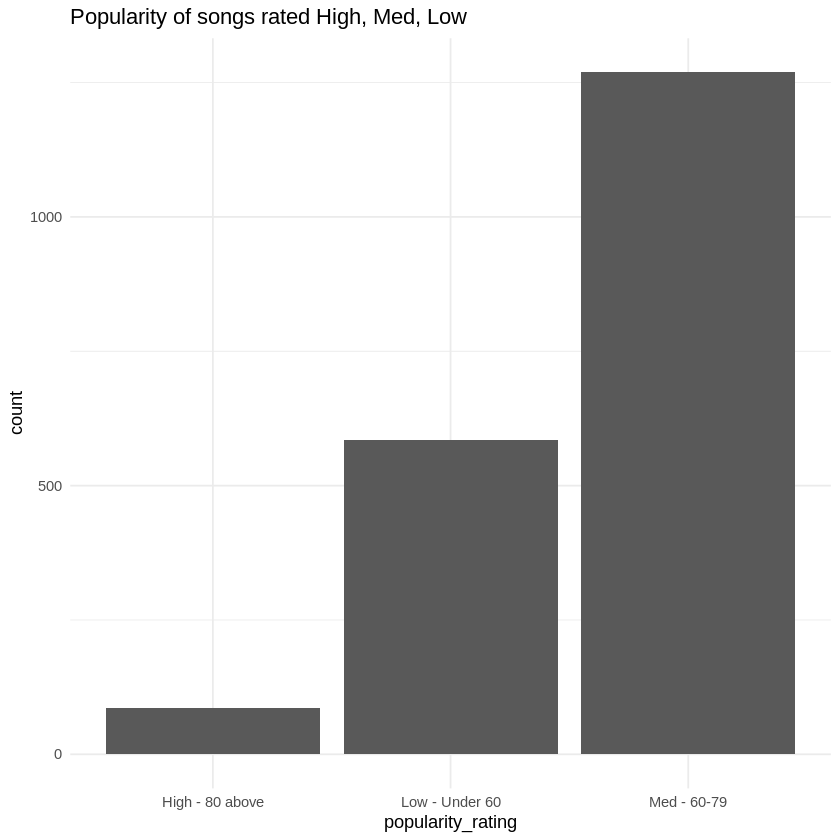

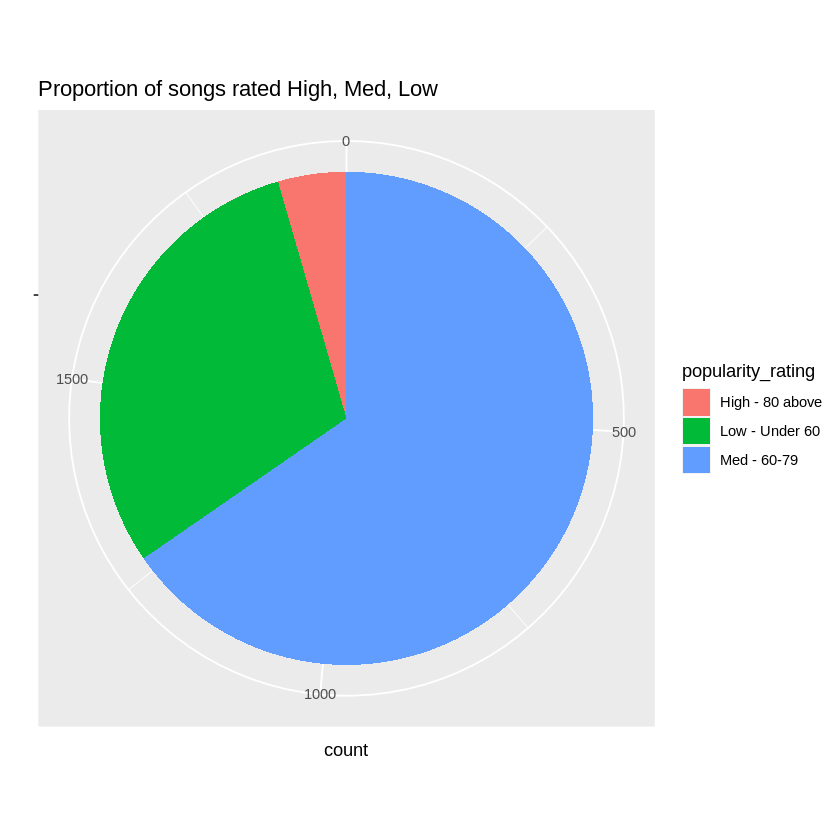

In [ ]:
ggplot(spotify_songs, aes(x = popularity_rating))+
  geom_bar() + labs(title="Popularity of songs rated High, Med, Low") + theme_minimal()
ggplot(spotify_songs,aes(x=factor(""),fill=popularity_rating))+
  geom_bar()+coord_polar(theta = "y") +
  scale_x_discrete("") +
  labs(title= "Proportion of songs rated High, Med, Low")

Nhận xét: Chúng ta có thể thấy từ biểu đồ pie ở trên có ít bài hát được đánh giá trên 80 so với các nhóm khác. Nhóm bài hát được đánh giá trung bình là đông đảo nhất.

### 3.6. 15 nghệ sĩ phát hành nhiều ca khúc nhất từ 2000 – 2020?

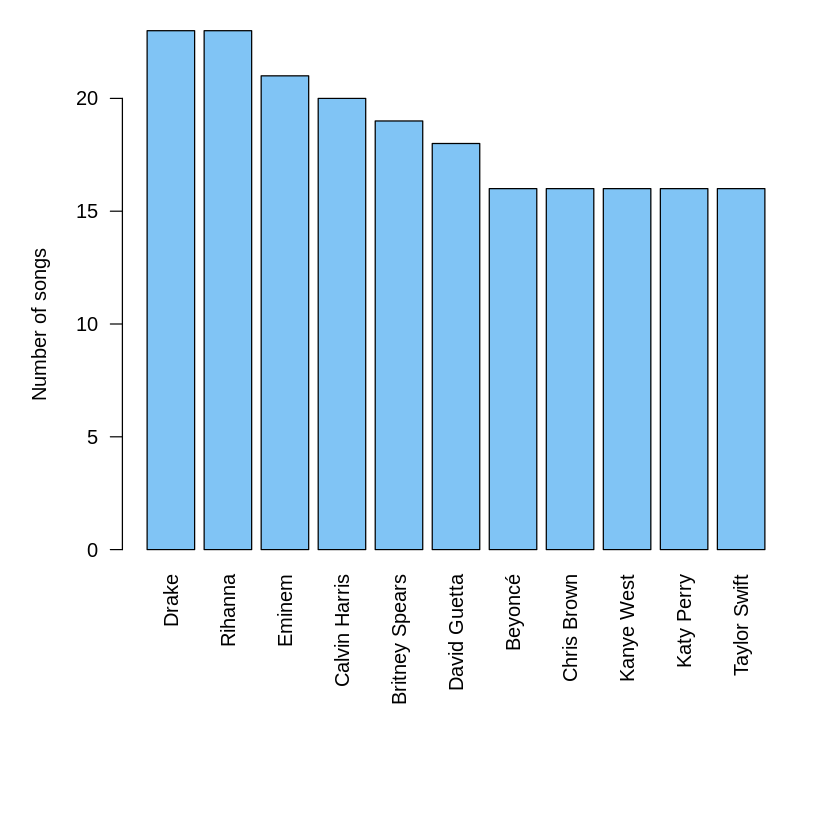

In [ ]:
Artist_Popular <- spotify_songs %>% count(artist, sort = TRUE, name =
                                               "Count")
Artist_Fil <- Artist_Popular %>% filter(Count >= 15)
par(mar = c(12, 5, 4, 2)+ 0.1)
barplot(Artist_Fil$Count,
 ylab = "Number of songs",
 col = "#80C4F5",
 names.arg= Artist_Fil$artist,
 width= 0.01,
 ylim = c(0,20),
 las = 2
 )


Nhận xét: Biểu đồ thanh hiển thị các nghệ sĩ nổi tiếng nhất với hơn 20 bài hát trở lên trong tập dữ liệu trong khoảng thời gian từ 2000-2020. Những nghệ sĩ có bài hát được yêu thích nhất là Drake và Rihanna, với hơn 20 bài hát. Điều này ngụ ý rằng họ là nghệ sĩ nổi tiếng nhất trên Spotify. Theo sau họ là Eminem, có số điểm là 20 với Calvin Harris. Thông tin đồ họa này cung cấp cho các nghệ sĩ rất nhiều thông tin hữu ích có thể giúp họ tăng lượng người hâm mộ và số lượt nghe bài hát của họ.

### 3.7. Độ dài của bài hát có thay đổi qua các năm không?

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


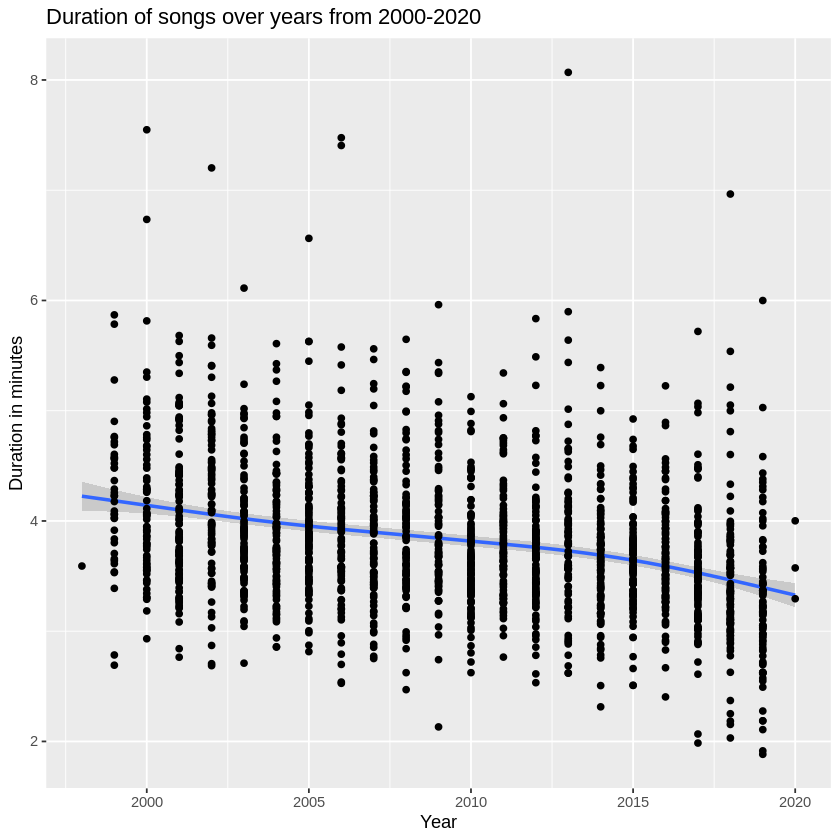

In [ ]:
song_duration<- transmute(spotify_songs, duration_min,
                                                     year)
ggplot(song_duration, aes(x=year, y=duration_min)) +
 labs(title = "Duration of songs over years from 2000-2020") +
 labs(x="Year") + labs(y= "Duration in minutes") +
 geom_smooth() +
 geom_point()


Nhận xét: Biểu đồ cho thấy sự thay đổi về thời lượng của các bài hát qua các năm. Theo biểu đồ đường xu hướng phân tán ở trên, thời lượng trung bình của các bài hát đã giảm theo thời gian, thể hiện rõ xu hướng đi xuống. Đường xu hướng màu xanh biểu thị sự hồi quy đi xuống của thời lượng bài hát; Trước năm 2005, thời lượng của các bài hát là hơn 4 phút, trong khi đó, sau năm 2005, thời lượng dường như giảm dần. Nó đang giảm từ mức trung bình 4 phút vào đầu những năm 2000 xuống mức trung bình gần 3,5 phút vào năm 2019. Điều này là do thế hệ trẻ có thể có xu hướng nghe các bài hát có thời lượng ngắn hơn và chuyển sang bản nhạc tiếp theo trùng với thời gian tầm quan trọng ngày càng tăng của số liệu AI và đề xuất được cá nhân hóa. Phân tích này có thể hữu ích để nghệ sĩ hoặc tác giả bài hát biết được sở thích của người dùng Spotify.

### 3.8. Mức độ phổ biến và giá trị của bài hát tương quan như thế nào với thời lượng?

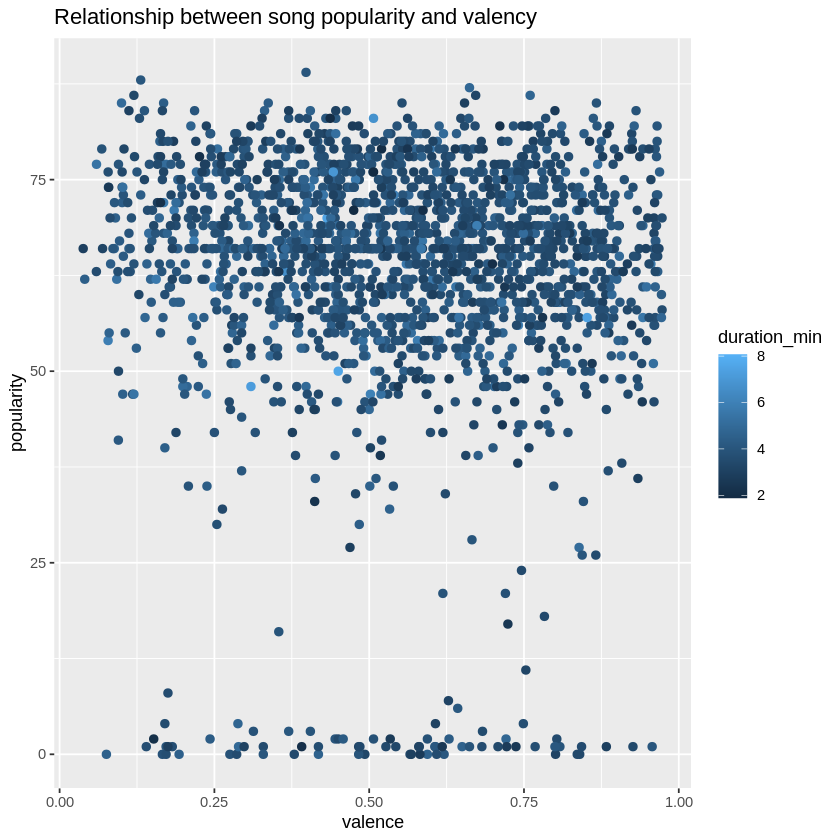

In [ ]:
ggplot(spotify_songs, aes(x=valence, y=popularity, color=duration_min)) +
 geom_point(size=2) +
 ggtitle("Relationship between song popularity and valency")


Nhận xét: Biểu đồ phân tán trực quan ở trên cho thấy mối quan hệ giữa mức độ phổ biến của bài hát và tính tích cực của chúng. “valency” là tính tích cực của bài hát - số “valency” càng lớn thì bài hát càng tích cực. Những bài hát tích cực nhất không nhất thiết phải là những bài hát phổ biến nhất. Phần lớn nằm trong khoảng từ 50-85 trên thang mức độ phổ biến bất kể giá trị. Tuy nhiên, thời lượng là một tiêu chí hợp lệ về mức độ phổ biến vì các bài hát dài nhất (màu xanh nhạt) thấp hơn cả về mức độ phổ biến và giá trị.

**Kết luận:**
* Dòng nhạc pop là dòng nhạc phổ biến và thành công nhất trên thế giới.
*   	Nghệ sĩ có nhiều bài hát và nổi tiếng nhất là Drake và Rihanna.
* Hầu hết các bài hát đều được đánh giá ở mức độ trung bình
*  	Không có mối quan hệ quan trọng nào giữa giá trị của bài hát và mức độ phổ biến của nó.
*  	Thời lượng của bài hát ngày càng ngắn hơn.



## 4.Tổng hợp thống kê (Statistical Summary)

In [ ]:
summary(spotify_songs)

    artist              song            explicit            year     
 Length:1941        Length:1941        Mode :logical   Min.   :1998  
 Class :character   Class :character   FALSE:1404      1st Qu.:2004  
 Mode  :character   Mode  :character   TRUE :537       Median :2010  
                                                       Mean   :2010  
                                                       3rd Qu.:2015  
                                                       Max.   :2020  
   popularity     danceability        energy          loudness      
 Min.   : 0.00   Min.   :0.1290   Min.   :0.0549   Min.   :-20.514  
 1st Qu.:58.00   1st Qu.:0.5810   1st Qu.:0.6240   1st Qu.: -6.490  
 Median :66.00   Median :0.6760   Median :0.7390   Median : -5.285  
 Mean   :63.24   Mean   :0.6678   Mean   :0.7215   Mean   : -5.514  
 3rd Qu.:73.00   3rd Qu.:0.7650   3rd Qu.:0.8400   3rd Qu.: -4.168  
 Max.   :89.00   Max.   :0.9750   Max.   :0.9990   Max.   : -0.276  
  speechiness      acoustic

### 4.1. Sử dụng hàm summary() cho cột valence.

In [ ]:
summary(spotify_songs$valence)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0381  0.3900  0.5600  0.5530  0.7310  0.9730 

In [ ]:
sd(spotify_songs$valence)

[1] 0.2208454

**Nhận xét:**  Dựa trên bản tóm tắt thống kê, giá trị “valency” tối thiểu là 0,0381. Dựa trên tập dữ liệu, valency thấp hơn gây ra những cảm xúc tiêu cực, chẳng hạn như buồn bã, trầm cảm và tức giận. Mặt khác, số valency tối đa 0,973 biểu thị tính tích cực mà bài hát truyền tải. Chúng ta có thể suy ra rằng phạm vi là từ 0 đến 1,0. Giá trị valency trung bình là 0,553, có thể so sánh được tới giá trị trung vị là 0,56. Điều này có nghĩa là sự cân bằng của cả bài hát tích cực và tiêu cực từ tập dữ liệu với độ lệch trái nhẹ.

Cuối cùng, độ lệch chuẩn 0,221 cho chúng ta biết rằng các điểm dữ liệu được trải đều, trong đó 68% số điểm dữ liệu nằm trong khoảng từ 0,21 đến 0,77.


### 4.2. Sử dụng hàm summary() cho cột duration_min:

In [ ]:
summary(spotify_songs$duration_min)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.883   3.392   3.720   3.810   4.132   8.069 

In [ ]:
sd(spotify_songs$duration_min)

[1] 0.6541633

**Nhận xét:** “Duration_min” là thời lượng của bất kỳ bài hát cụ thể nào tính bằng phút trong tập dữ liệu Spotify. Tóm tắt thống kê cho thấy thời lượng tối thiểu của bài hát là 1,88 phút. Độ dài bài hát tối đa là 8,069 phút. Chúng ta có thể nói rằng thời lượng của bài hát là khoảng 2 đến 8 phút. Thời lượng trung bình của các bài hát là 3,81 phút, tương đương với giá trị trung vị là 3,72. Vì không có sự khác biệt đáng kể về thời lượng của bài hát giữa giá trị trung bình và giá trị trung bình nên chúng tôi có thể kết luận rằng không có nhiều ngoại lệ. Có một chút sai lệch bên phải.

Cuối cùng, độ lệch chuẩn cho chúng ta biết rằng thời lượng của bài hát thay đổi 0,65. Điều này có nghĩa là 65% bài hát có độ dài trong vòng 0,65 phút (hoặc 39 giây) so với mức trung bình là 3,8 (hoặc 3 phút 48 giây). Điều này cho thấy thời lượng của bài hát không được dàn trải rộng rãi.

### 4.3. Sử dụng hàm summary() cho cột tempo

In [ ]:
summary(spotify_songs$tempo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.02   98.99  120.03  120.16  134.20  210.85 

In [ ]:
sd(spotify_songs$tempo)

[1] 26.99047

**Nhận xét:** Dựa trên bản tóm tắt thống kê, nhịp  tối thiểu là 60.01, có nghĩa là nhịp đập đó chính xác một lần mỗi giây. Dựa trên tập dữ liệu, nhịp độ thấp hơn sẽ kích hoạt bài hát ở tốc độ chậm và biểu thị sự êm dịu trong bài hát với giá trị tối thiểu. Mặt khác, số nhịp độ tối đa là 210.85 cho biết nhịp độ nhanh nhất dựa trên tập dữ liệu. Chúng ta có thể suy ra phạm vi đó là từ 60.01 đến 210.85. Nhịp độ trung bình của bài hát là 120.16, nhanh gấp đôi, với hai nhịp mỗi giây. Giá trị trung bình khá tương đương với giá trị trung vị là 120.02, điều này có nghĩa là có sự cân bằng giữa cả nhịp độ nhanh và nhịp độ chậm. Thống kê này được sử dụng trong ứng dụng mà thời lượng âm nhạc, chẳng hạn như trong ngành công nghiệp âm nhạc, phải hoàn toàn chính xác.

Cuối cùng, khoảng thời gian tiêu chuẩn là 26,99 cho chúng ta biết rằng các điểm dữ liệu được trải đều và không tập trung chặt chẽ xung quanh giá trị trung bình.


## 5. Tạo các cột mới.

### 5.1. Câu lệnh này được sử dụng để tạo một cột mới với mức độ phổ biến (popularity_rating) từ biến số đến biến phân loại được sử dụng để tạo hình ảnh trực quan về tỷ lệ các bài hát được xếp hạng cao (high), trung bình (med) và thấp (low).

In [ ]:
f1 <- function(spotify_songs) +
 {
     spotify_songs$popularity_rating <- as.factor(
         ifelse(spotify_songs$popularity <= 60, "Low - Under 60",
                ifelse(spotify_songs$popularity <= 80, "Med - 60-79",
                       "High - 80 above"))
     )
    return(spotify_songs)
 }
spotify_songs <- f1(spotify_songs)
head(spotify_songs$popularity_rating)

[1] Med - 60-79 Med - 60-79 Med - 60-79 Med - 60-79 Med - 60-79 Med - 60-79
Levels: High - 80 above Low - Under 60 Med - 60-79

In [ ]:
head(spotify_songs)

,artist,song,explicit,year,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,genre,duration_min,popularity_rating
,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
1,Britney Spears,Oops!...I Did It Again,FALSE,2000,77,0.751,0.834,-5.444,0.0437,0.3000,0.3550,0.894,95.053,pop,3.519333,Med - 60-79
2,blink-182,All The Small Things,FALSE,1999,79,0.434,0.897,-4.918,0.0488,0.0103,0.6120,0.684,148.726,"rock, pop",2.784433,Med - 60-79
3,Faith Hill,Breathe,FALSE,1999,66,0.529,0.496,-9.007,0.0290,0.1730,0.2510,0.278,136.859,"pop, country",4.175767,Med - 60-79
4,Bon Jovi,It's My Life,FALSE,2000,78,0.551,0.913,-4.063,0.0466,0.0263,0.3470,0.544,119.992,"rock, metal",3.741550,Med - 60-79
5,*NSYNC,Bye Bye Bye,FALSE,2000,65,0.614,0.928,-4.806,0.0516,0.0408,0.0845,0.879,172.656,pop,3.342667,Med - 60-79
6,Sisqo,Thong Song,TRUE,1999,69,0.706,0.888,-6.959,0.0654,0.1190,0.0700,0.714,121.549,"hip hop, pop, R&B",4.228883,Med - 60-79
